# Satellite Images Classification

Import the required libraries

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import InceptionV3
from keras.applications import vgg16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Import data

In [2]:
folder_path = r"C:\Users\808178\OneDrive - University of Witwatersrand\IBM Machine Learning Cert\Deeplearning and reinforcement learning\Project for peer review\data"
target_size = (224, 224)

images = []
labels = []
for label in os.listdir(folder_path):
    label_path = os.path.join(folder_path, label)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.resize(target_size)
                    img = img.convert("RGB")
                    img_array = np.array(img)
                    # if img_array.shape == (224, 224, 3):  # Check if shape matches
                    images.append(img_array)
                    labels.append(label)
                    # else:
                    #     print(f"Skipping image with unexpected shape: {img_path}")
            except Exception as e:
                print(f"Could not process image {img_path}: {e}")
                
# # The data, shuffled and split between train and test sets:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

Split the dataset into training and test sets

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

Training set: 4504 samples
Testing set: 1127 samples


In [4]:
X_train[10].shape

(224, 224, 3)

desert


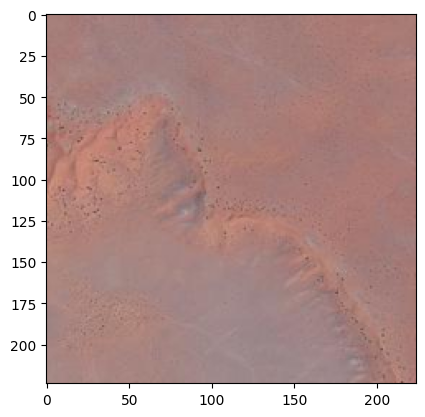

In [5]:
print(y_train[100])
plt.imshow(X_train[100])

In [6]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use the same encoder for y_test

num_classes = 4
y_train = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = keras.utils.to_categorical(y_test_encoded, num_classes)

In [7]:
y_train[100]

array([0., 1., 0., 0.])

Building a CNN

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
cnn_model = Sequential()

## 7x7 convolution with 2x2 stride and 24 filters
cnn_model.add(Conv2D(24, (7, 7), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
cnn_model.add(Activation('relu'))

## Another 7x7 convolution with 2x2 stride and 24 filters
cnn_model.add(Conv2D(24, (7, 7), strides = (2,2)))
cnn_model.add(Activation('relu'))

## 2x2 max pooling
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

## Flatten
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))
# cnn_model.add(Activation('softmax'))

cnn_model.summary()

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 24)   │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 112, 112, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 24)     │        28,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 53, 53, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,307,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,341,052 (31.82 MB)

 Trainable params: 8,341,052 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (4504, 224, 224, 3)
y_train shape: (4504, 4)


In [10]:
print(f"X_test dtype: {X_test.dtype}")
print(f"y_test dtype: {y_test.dtype}")

X_test dtype: uint8
y_test dtype: float64


Train the model

In [11]:
batch_size = 224

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005)

# Train the model using RMSprop
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3637 - loss: 297.6425 - val_accuracy: 0.7028 - val_loss: 0.8287
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6932 - loss: 0.7858 - val_accuracy: 0.6486 - val_loss: 0.6766
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6650 - loss: 0.7183 - val_accuracy: 0.6770 - val_loss: 0.6419
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5398 - loss: 1.2161 - val_accuracy: 0.4783 - val_loss: 0.8165
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4681 - loss: 7.3696 - val_accuracy: 0.2555 - val_loss: 1.4033
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2662 - loss: 1.3856 - val_accuracy: 0.2538 - val_loss: 1.3837
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2778 - loss: 1.3790 - val_accuracy: 0.2928 - val_loss: 1.3626
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2985 - loss: 1.4032 - val_accuracy: 0.2023 - val_los

Multi-layer perceptron

In [12]:
# X_train has shape (num_samples, height, width, channels)
num_samples = X_train.shape[0]
height = X_train.shape[1]
width = X_train.shape[2]
channels = X_train.shape[3]

# Flatten the images
X_train_flattened = X_train.reshape(num_samples, height * width * channels)
X_test_flattened = X_test.reshape(X_test.shape[0], height * width * channels)

mlp_model = MLPClassifier().fit(X_train_flattened, y_train)
y_pred = mlp_model.predict(X_test_flattened)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.0


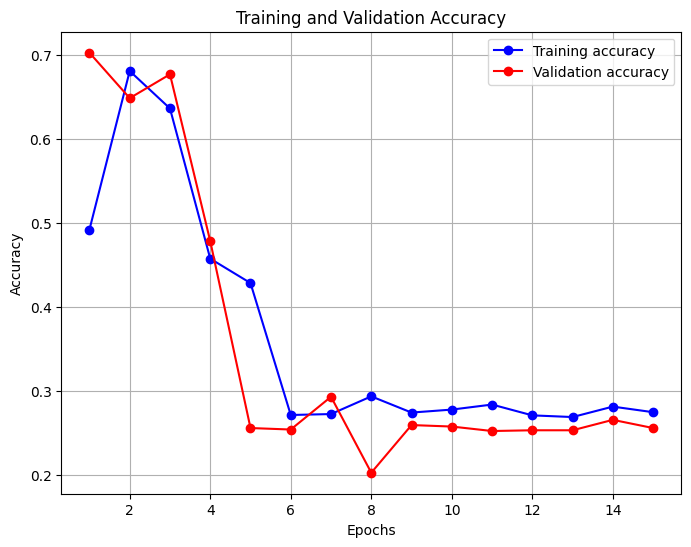

In [13]:
# Generate the number of epochs
epochs = range(1, len(history.history['accuracy']) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Transfer learning

In [14]:
input_shape = (224, 224, 3)

vgg = vgg16.VGG16(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape)

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
basemodel = Model(vgg.input, output)

basemodel.trainable = False
for layer in basemodel.layers: layer.trainable = False

input_shape = basemodel.output_shape[1]

tfl_model = Sequential()
tfl_model.add(basemodel)
tfl_model.add(Dense(512, activation='relu', input_dim=input_shape))
tfl_model.add(Dropout(0.3))
tfl_model.add(Dense(512, activation='relu'))
tfl_model.add(Dropout(0.3))
tfl_model.add(Dense(4, activation='softmax'))
# print(tfl_model.summary())

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
tfl_model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [16]:
# from keras.callbacks import LearningRateScheduler
# checkpoint_path='O_R_tlearn_image_augm_cnn_vgg16.h5'

# # define step decay function
# class LossHistory_(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []
#         self.lr = []
        
#     def on_epoch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
#         self.lr.append(exp_decay(len(self.losses)))
#         print('lr:', exp_decay(len(self.losses)))

# def exp_decay(epoch):
#     initial_lrate = 1e-5
#     k = 0.1
#     lrate = initial_lrate * np.exp(-k*epoch)
#     return lrate

# # learning schedule callback
# loss_history_ = LossHistory_()
# lrate_ = LearningRateScheduler(exp_decay)

# keras_callbacks = [
#       EarlyStopping(monitor = 'loss', 
#                     patience = 5, 
#                     mode = 'min', 
#                     min_delta=0.01),
#       ModelCheckpoint(checkpoint_path, monitor='loss', save_best_only=True, mode='min')
# ]

# callbacks_list_ = [loss_history_, lrate_, keras_callbacks]

: 

In [17]:
history1 = tfl_model.fit(X_train, y_train, 
                              steps_per_epoch=4, 
                              epochs=5,
                              validation_data=(X_test,y_test), 
                              validation_steps=4, 
                              verbose=1) 

Epoch 1/5
